# Make a full overview of number counts for SPIRE bands



In [1]:
%matplotlib inline


#import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
#plt.rc('figure', figsize=(10, 6))
#from matplotlib_venn import venn3

import herschelhelp 
from herschelhelp.utils import clean_table
from herschelhelp_internal.utils import inMoc, coords_to_hpidx
from astropy.table import Table, vstack

#import pyvo as vo

from pymoc import MOC
import healpy as hp

import time

import yaml



import warnings
warnings.filterwarnings('ignore')

In [2]:
fields = yaml.load(open('../../../dmu2/meta_main.yml', 'r'))['fields']

In [3]:
bands = [
    'mips_24',
    'pacs_green', 
    'pacs_red', 
    'spire_250', 
    'spire_350', 
    'spire_500'
]
mag_tables = {}


for band in bands:
    mag_tables[band] = {}
    for f in fields:
      
        mag_tables[band].update({f['name']: None})

In [4]:
cols = ['help_id','field','hp_idx','ra','dec']
cols += ['f_{}'.format(band) for band in bands]
cols += ['ferr_{}'.format(band) for band in bands]

In [5]:
cols

['help_id',
 'field',
 'hp_idx',
 'ra',
 'dec',
 'f_mips_24',
 'f_pacs_green',
 'f_pacs_red',
 'f_spire_250',
 'f_spire_350',
 'f_spire_500',
 'ferr_mips_24',
 'ferr_pacs_green',
 'ferr_pacs_red',
 'ferr_spire_250',
 'ferr_spire_350',
 'ferr_spire_500']

In [6]:
cat = Table.read('../../../dmu32/dmu32_AllSky/data/HELP_all_sky_A-list_20201111.fits')[cols]
#cat.write('../../../dmu32/dmu32_AllSky/data/HELP_all_sky_A-list_20201111.fits', overwrite=True)

(array([2.0000e+00, 5.0000e+00, 8.0000e+00, 2.0000e+00, 1.4000e+01,
        2.7000e+01, 3.0000e+01, 2.7000e+01, 3.3000e+01, 4.1000e+01,
        7.9000e+01, 8.6000e+01, 1.0800e+02, 1.1500e+02, 1.4100e+02,
        2.0400e+02, 4.3600e+02, 3.9700e+02, 3.9700e+02, 3.3300e+02,
        3.0100e+02, 2.9400e+02, 2.9600e+02, 3.3500e+02, 3.6700e+02,
        4.4600e+02, 6.2700e+02, 7.3500e+02, 9.2300e+02, 1.1000e+03,
        1.3240e+03, 1.6250e+03, 1.9810e+03, 2.3570e+03, 2.8150e+03,
        3.3810e+03, 4.3130e+03, 5.3640e+03, 6.7030e+03, 8.2410e+03,
        1.0216e+04, 1.2727e+04, 1.5143e+04, 1.7805e+04, 2.0116e+04,
        2.2645e+04, 2.5016e+04, 2.7322e+04, 2.9273e+04, 3.0826e+04,
        3.1414e+04, 3.1852e+04, 3.1511e+04, 3.2013e+04, 3.0780e+04,
        2.9559e+04, 2.7908e+04, 2.6077e+04, 2.4408e+04, 2.2165e+04,
        2.0207e+04, 1.7840e+04, 1.5581e+04, 1.3709e+04, 1.1684e+04,
        9.7210e+03, 7.5810e+03, 5.7110e+03, 4.2740e+03, 3.2340e+03,
        2.2930e+03, 1.6470e+03, 1.2470e+03, 9.40

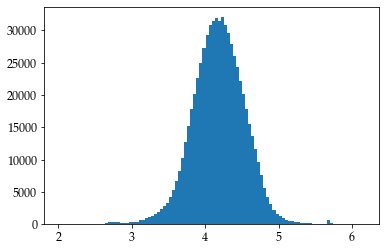

In [32]:
plt.hist(np.log10(cat['f_pacs_green']), bins=100)

In [7]:
len(cat)

1718100

In [8]:
cat['hp_idx_o10']=coords_to_hpidx(cat['ra'], cat['dec'],10)
len(np.unique(cat['hp_idx_o10']))

281001

In [37]:
cat['hp_idx_o11']=coords_to_hpidx(cat['ra'], cat['dec'],11)
len(np.unique(cat['hp_idx_o11']))

777838

In [9]:
from pymoc import MOC
t_moc = MOC(10, [cat['hp_idx_o10'][0] ])
t_moc.area_sq_deg

0.0032784908016061202

In [38]:
from pymoc import MOC
t11_moc = MOC(11, [cat['hp_idx_o11'][0] ])
t11_moc.area_sq_deg

0.0008196227004015301

## Plot the histograms

In [10]:
bands_plotting = {
    #'mips_24':['MIPS 24','y'], 
    'pacs_green':['PACS Green','g'], 
    'pacs_red':['PACS red','r'], 
    'spire_250':['SPIRE 250','b'],  
    'spire_350':['SPIRE 350','c'],  
    'spire_500':['SPIRE 500','m'],  

}

In [11]:
areas = {}
for band in bands:
    areas.update({band: {}})
    for n, f in enumerate(fields):
        f = f['name']
        f_moc = MOC(filename='../../../dmu2/dmu2_field_coverages/{}_MOC.fits'.format(f))
    
        #band_moc = MOC(10,
        #    depth_result[~np.isnan(depth_result['ferr_{}_mean'.format(band)])]['hp_idx_o_10']
        #)
        area = f_moc.area_sq_deg #.flattened(order=10)
        areas[band].update({f: area})
        
#np.save('./data/areas.npy', areas) 

In [12]:
total_area = 0.
for f in areas['spire_250']:
    total_area +=areas['spire_250'][f]
total_area

1269.1102950569134

'best'	0
'upper right'	1
'upper left'	2
'lower left'	3
'lower right'	4
'right'	5
'center left'	6
'center right'	7
'lower center'	8
'upper center'	9
'center'	10

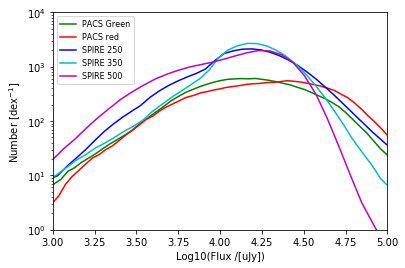

In [13]:
fig, ax = plt.subplots()



area = 5
for band in bands_plotting:
    mask = np.isfinite(np.log10(cat['f_'+band]))
    mags = cat[mask]['f_'+band]
    if not np.sum(mask)==0:
        #vz.hist(table[name][mask], bins='scott', label=label, alpha=.5)
        h = np.histogram(np.log10(mags), bins = 100)
        bin_width = (np.abs(h[1][5] - h[1][4]) )
        #ax.fill_between( h[1][:-1], h[0]/bin_width)#, alpha=0.4)
        ax.plot( h[1][:-1], h[0]/(bin_width*total_area) , c=bands_plotting[band][1],
               label=bands_plotting[band][0])#, alpha=0.4)


ax.legend(loc=0, fontsize=8)

plt.xlim(3.5,5.)
plt.xlabel("Log10(Flux /[uJy])")
plt.yscale('log')
#plt.xscale('log')
plt.ylim(1.e0,1.e4)
plt.ylabel('Number [dex$^{-1}$]')

#plt.rc('font', family='serif', serif='Times')
#plt.rc('text') #, usetex=True)
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)


plt.savefig('./figs/numbers_AllSky.pdf', bbox_inches='tight')
plt.savefig('./figs/numbers_AllSky.png', bbox_inches='tight')

In [14]:

#areas = np.load('./data/areas.npy').item()

In [15]:
areas

{'mips_24': {'AKARI-NEP': 9.194732358779467,
  'AKARI-SEP': 8.713306475131118,
  'Bootes': 11.42815299095486,
  'CDFS-SWIRE': 12.971246403717068,
  'COSMOS': 5.083863478496816,
  'EGS': 3.566383275122158,
  'ELAIS-N1': 13.507484555454763,
  'ELAIS-N2': 9.167479903991113,
  'ELAIS-S1': 9.002940646885508,
  'GAMA-09': 62.01393417284915,
  'GAMA-12': 62.70933280772107,
  'GAMA-15': 61.70114565980842,
  'HDF-N': 0.6717832558166041,
  'Herschel-Stripe-82': 363.22747930641884,
  'Lockman-SWIRE': 22.413863402949218,
  'HATLAS-NGP': 177.6981971077162,
  'SA13': 0.27416379328431184,
  'HATLAS-SGP': 294.5684540900642,
  'SPIRE-NEP': 0.1280660469377391,
  'SSDF': 111.11624949343539,
  'xFLS': 7.44043242140754,
  'XMM-13hr': 0.7570240166583633,
  'XMM-LSS': 21.75457939331374},
 'pacs_green': {'AKARI-NEP': 9.194732358779467,
  'AKARI-SEP': 8.713306475131118,
  'Bootes': 11.42815299095486,
  'CDFS-SWIRE': 12.971246403717068,
  'COSMOS': 5.083863478496816,
  'EGS': 3.566383275122158,
  'ELAIS-N1': 13

In [21]:
for n, f in enumerate(fields):
    f = f['name']
        
    x, y = np.floor_divide(n, dim[0]), np.remainder(n, dim[0])
    print(x,y)

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3
5 0
5 1
5 2


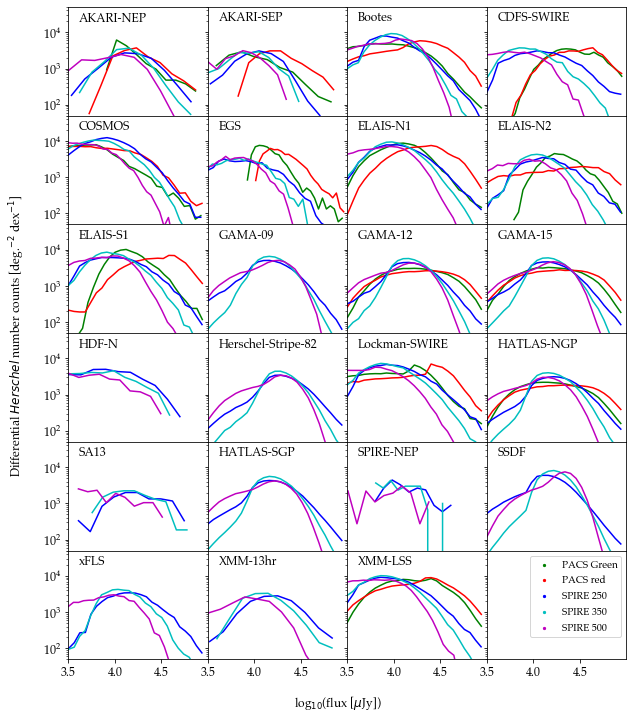

In [39]:
dim = [4,6]
fig, axes = plt.subplots(dim[1], dim[0], sharex=True, sharey=True)
plt.rcParams.update({'font.size': 12})
xlims = [3.5,5]

#area_per_pixel  = MOC(10, (1234)).area_sq_degrees
for n, f in enumerate(fields):
    f = f['name']
        
    x, y = np.floor_divide(n, dim[0]), np.remainder(n, dim[0])
    
   
    
    
    for band in bands_plotting: #[b for b in mag_tables if b.endswith('g')]:
        try:
            #No NaNa
            mask = np.isfinite(np.log10(cat['f_'+band]))
            #S/N>2
            mask &= cat['f_'+band]/cat['ferr_'+band]>0.5
            #This field
            mask &= cat['field'] == f.replace('HATLAS-NGP', 'NGP').replace('Lockman-SWIRE', 'Lockman SWIRE')
            #get area using mask before limits
            area=len(np.unique(cat[mask]['hp_idx_o11']))*t11_moc.area_sq_deg
            
            #remove outside lims
            
            mask &= np.log10(cat['f_'+band]) >xlims[0]
            mask &= np.log10(cat['f_'+band]) <xlims[1]
            mags = cat[mask]['f_'+band]
            #mask &= (bands[band][0]['field'] == f)

        
            #area = areas[band][f]
            #area= np.unique(cat[mask]['hp_idx_o_10'])*t_moc.area_sq_deg
            #area=f_moc.area_sq_deg
            
            if not np.sum(mask)==0:
                #vz.hist(table[name][mask], bins='scott', label=label, alpha=.5)
                if area<1:
                    bins=10
                else:
                    bins =25
                h = np.histogram(np.log10(mags), bins = bins)
                bin_width = (np.abs(h[1][5] - h[1][4]) )
                #ax.fill_between( h[1][:-1], h[0]/bin_width)#, alpha=0.4)
                axes[x,y].plot( h[1][:-1], h[0]/(bin_width*area), c=bands_plotting[band][1])#, alpha=0.4)
        except:
            print('Failed: {}, {}'.format(band,f))


    axes[x,y].set_xlim([3.5,5.0])
    axes[x,y].set_xticks([])
    axes[x,y].set_ylim([5.e1, 5.e4])
    axes[x,y].set_yscale('log')
    #print(f,x,y)
    axes[x,y].scatter([-99],[-99], 
                      label=f, 
                      c='w', s=0.0001)
    axes[x,y].legend(frameon=False, loc=(-0.2, 0.8)) #, bbox_to_anchor=(0.1, 0.7, 0.2, 0.2)




for band in bands_plotting: #[b for b in mag_tables if b.endswith('g')]:
    axes[dim[1]-1,dim[0]-1].scatter([-99],[-99], 
                      label=bands_plotting[band][0], 
                      c=bands_plotting[band][1], s=5.)
axes[dim[1]-1,dim[0]-1].legend( prop={'size': 10},ncol=1)    

for x in np.arange(4):
    axes[5,x].set_xlim([3.5,5.0])
    axes[5,x].set_xticks([3.5,3,4,4.5])
    axes[5,x].set_ylim([5.e1, 5.e4])
    axes[5,x].set_yscale('log')
#axes[dim[1]-1,dim[0]-1].tick_params(axis='x', labelsize=8)
#axes[dim[1]-1,dim[0]-1].set_xlabel('band')
    
fig.text(0.5, 0.07, 'log$_{10}$(flux [$\mu$Jy]) ', ha='center')
fig.text(0.04, 0.5, 'Differential $Herschel$ number counts [deg.$^{-2}$ dex$^{-1}$]', va='center', rotation='vertical')

fig.set_size_inches(10, 12)
fig.subplots_adjust(hspace=0, wspace=0)
plt.xlim([3.5,5.])
plt.rc('axes', labelsize=12)
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
#plt.show()
plt.savefig('./figs/numbers_Herschel_allfields.pdf', bbox_inches='tight')
plt.savefig('./figs/numbers_Herschel_allfields.png', bbox_inches='tight')

In [18]:
np.sum((cat['field']=='AKARI-SEP' ) & (cat['f_spire_250']/cat['ferr_spire_250']>2))

0

In [26]:
dim[1]-1

5